In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread
from scipy.optimize import curve_fit
from scipy import stats  
shot=119
picL = 18333
picR = 18158
F_big = [[  1.75345969e-07,   1.87353876e-05,  -3.69560210e-03], [  1.92508173e-05,   9.79548859e-07,  -5.72239187e-02],[ -3.15390413e-03,   5.12220927e-02,   9.97034661e-01]]
F = F_big
Matr = F
MatrixL = np.array(Matr)
MatrixR = MatrixL.transpose()
Linex = np.arange(0,384,1)
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))
dataR = imread('./Data/Kernel/18185.png')
dataL = imread('./Data/Kernel/18333.png')
df = pd.read_csv("./Data/Kernel/points.csv")
df.head()

,Unnamed: 0,18333 X,18333 Y,18158 X,18158 Y
0,0,260,49,105,46
1,1,289,89,236,81
2,2,249,98,85,97
3,3,259,103,80,102
4,4,313,105,105,102


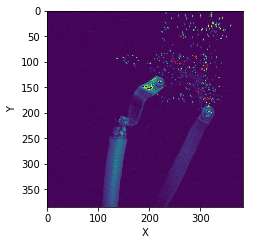

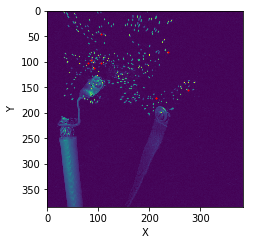

In [4]:
plt.figure(figsize=(4,4))
plt.imshow(bk0L+dataL)
x = Linex
for i in range(0,len(df)/1):
    ip = i*1
    plx = df['18333 X'].iloc[ip]
    ply = df['18333 Y'].iloc[ip]
    prx = df['18158 X'].iloc[ip]
    pry = df['18158 Y'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    plx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    ply1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    prx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    pry1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    #plt.plot(x,yL,color='r',linestyle='-',linewidth=0.1)
    #plt.plot(x,yR,color='r')
    #plt.plot(prx,pry,"o",color='r')    
    plt.plot(plx,ply,"+",color='r',markersize=2)  
    #plt.plot(plx1,ply1,"o",color='b',markersize=0.2)  
    plt.xlabel('X');
    plt.ylabel('Y');
    #print(ip,dlr,drl)
plt.ylim(384,0)
plt.subplots_adjust(bottom=0.2)
plt.savefig("./LCA_Feature_Pair_L{}_Point.pdf".format(shot))
plt.show()
plt.figure(figsize=(4,4))
plt.imshow(bk0R+dataR)
x = np.arange(0,384,1)
for i in range(0,len(df)/1):
    ip = i*1
    plx = df['18333 X'].iloc[ip]
    ply = df['18333 Y'].iloc[ip]
    prx = df['18158 X'].iloc[ip]
    pry = df['18158 Y'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    plx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    ply1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    prx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    pry1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    #plt.plot(x,yL,color='g')
    #plt.plot(x,yR,color='r',linestyle='-',linewidth=0.1)
    plt.plot(prx,pry,"+",color='r',markersize=2)
    #plt.plot(prx1,pry1,"o",color='b',markersize=0.2)    
    #plt.plot(plx,ply,"o",color='b')  
    plt.xlabel('X');
    plt.ylabel('Y');
    #print(ip,dlr,drl)
plt.ylim(384,0)
plt.subplots_adjust(bottom=0.2)
plt.savefig("./LCA_Feature_Pair_R{}_Point.pdf".format(shot))
plt.show()

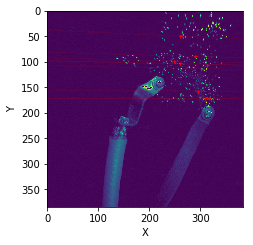

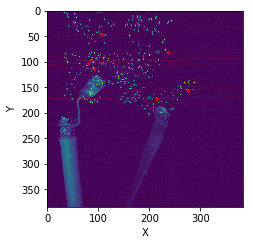

In [7]:
plt.figure(figsize=(4,4))
plt.imshow(bk0L+dataL)
x = Linex
for i in range(0,len(df)/1):
    ip = i*1
    plx = df['18333 X'].iloc[ip]
    ply = df['18333 Y'].iloc[ip]
    prx = df['18158 X'].iloc[ip]
    pry = df['18158 Y'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    plx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    ply1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    prx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    pry1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yL,color='r',linestyle='-',linewidth=0.1)  
    plt.plot(plx,ply,"+",color='r',markersize=3)  
    #plt.plot(plx1,ply1,"o",color='b',markersize=0.2)  
    plt.xlabel('X');
    plt.ylabel('Y');
    #print(ip,dlr,drl)
plt.ylim(384,0)
plt.subplots_adjust(bottom=0.2)
plt.savefig("./LCA_Feature_Pair_L{}_Line.pdf".format(shot))
plt.show()
plt.figure(figsize=(4,4))
plt.imshow(bk0R+dataR)
x = np.arange(0,384,1)
for i in range(0,len(df)/1):
    ip = i*1
    plx = df['18333 X'].iloc[ip]
    ply = df['18333 Y'].iloc[ip]
    prx = df['18158 X'].iloc[ip]
    pry = df['18158 Y'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    plx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    ply1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    prx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    pry1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yR,color='r',linestyle='-',linewidth=0.1)
    plt.plot(prx,pry,"+",color='r',markersize=3)
    plt.xlabel('X');
    plt.ylabel('Y');
    #print(ip,dlr,drl)
plt.ylim(384,0)
plt.subplots_adjust(bottom=0.2)
plt.savefig("./LCA_Feature_Pair_R{}_Line.pdf".format(shot))
plt.show()

In [72]:
x = Linex
pairdata = []
for i in range(0,len(df)):
    min = 10000
    minIndex = 0
    for j in range(0,len(df)):
        plx = df['18333 X'].iloc[i]
        ply = df['18333 Y'].iloc[i]
        prx = df['18158 X'].iloc[j]
        pry = df['18158 Y'].iloc[j]
        ipL = [plx,ply,1]
        ipR = [prx,pry,1]
        LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
        LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
        yL = (-LineL[2]-LineL[0]*x)/LineL[1]
        yR = (-LineR[2]-LineR[0]*x)/LineR[1]
        plx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        ply1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        prx1 = (LineL[1]*(LineL[1]*plx-LineL[0]*ply)-LineL[0]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        pry1 = (LineL[0]*(-LineL[1]*plx+LineL[0]*ply)-LineL[1]*LineL[2])/(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
        dd = 0.5*(dlr+drl)
        if(dd<min):
            min = dd
            minIndex=j
    plx1 = df['18333 X'].iloc[i]
    ply1 = df['18333 Y'].iloc[i]
    prx1 = df['18158 X'].iloc[minIndex]
    pry1 = df['18158 Y'].iloc[minIndex]   
    data = [i,minIndex,plx1,ply1,prx1,pry1,min]
    if(min<5):
        pairdata.append(data)
#plt.ylim(384,0)
#plt.subplots_adjust(bottom=0.2)
#plt.savefig("./LCA_Feature_Pair_L{}_Line.pdf".format(shot))
#plt.show()

In [73]:
df = pd.DataFrame(pairdata)
df.columns = ['Left Index','Right Index','18333 X','18333 Y', '18158 X', '18158 Y', 'Epipolar']

In [74]:
df.to_csv('LCA_pair.csv')